In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn cluster, normalize, 
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline



$k$-means is a mathematically straightforward but computationally intensive hard-clustering method for grouping data into clusters of similar data points with similar variances.  It uses a cost function called the *inertia*, and the algorithm tries to choose means (called *centroids*) that minimize the inertia.  If you recall the lesson on linear regression, the formula for inertia may be familiar:

$$\sum(\bar{x}_c - x_i)^2$$

In words, the inertia is the sum of the squared differences between the centroid of a cluster (the mean $\bar{x}_c$) and the data points in the cluster ($x_i$).  The goal is to define cluster means so that the distance between a cluster mean and all the data points within the cluster is as small as possible.


__Inertia__: the cost function --> the sum of squared difference between the centroid and the data points in the cluster. 

- *k* is the number of centroids. (=# of clusters)
- *means* in the k-means refer to the centroids.

- *k-means* must converge on a solution 
    - begins with a random *k*, 
    (1) assign each data point to the nearest centroid, 
    (2) create new centroids by taking the mean of all data points assigned to each centroid. 
    - update *k*
    - Stopping rule: when the difference between the old and the new centroid is lower than a given threshold. 

__Assumptions made by *k*-means models__

- true clusters are radially symmetrical or isotropic -- they are uniform in all directions and the edges are curverd outward.

- assumes all clusters have similar variances. 


__Computationally costly__

- high dimensional data takes longer because it's more computationally costly to measure distance between each data point and the cluster mean in a high dimensional data space. 

    - run PCA beforehand 
    - MiniBatchKMeans randomly samples subsets of the training data in each iteration. 
    - soultion is a little worse than k-means but drastically faster. 
    
    


In [4]:

df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


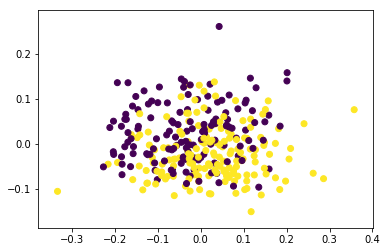

col_0   0   1
row_0        
0      84  65
1      55  99
total misclassification: 120


In [6]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

conf_matrix = pd.crosstab(y_pred, y)
print(conf_matrix)
print('total misclassification:', conf_matrix[0][1] + conf_matrix[1][0])


# Check the solution against the data.
#print('Comparing k-means clusters against the data:')
#print(pd.crosstab(y_pred, y))
#print(pd.crosstab)

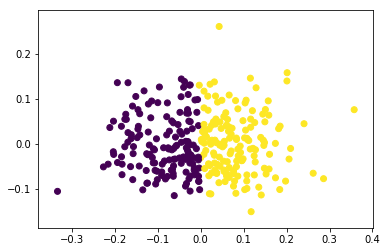

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99
total misclassification: 120


In [12]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()


# Check the solution against the data.
print('Comparing k-means clusters against the data:')
conf_matrix = pd.crosstab(y_pred, y)
print(conf_matrix)
print('total misclassification:', conf_matrix[0][1] + conf_matrix[1][0])

#print(pd.crosstab(y_pred, y))
#print(pd.crosstab)

In [16]:
X.shape

(303, 13)

The model is not doing very well as misclassification is 120. Trying MiniBatch in the following 



In [10]:
# Each batch is 200 data points 


minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)


# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      139    0
1       10  154



## Drill: More clusters?

Your task is to take the $k$-means code here and see what happens when you change the value of $k$.  What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set?  
 - What solution, if any, do you find most compelling? 
 - Does complexity start to become an issue with this data set? 

In [18]:
import time

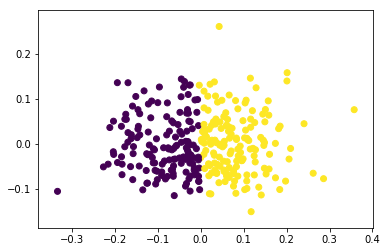

Comparing k-means clusters against the data with n_clusters:  2
col_0   0   1
row_0        
0      84  65
1      55  99
Total time:  0.2810208797454834


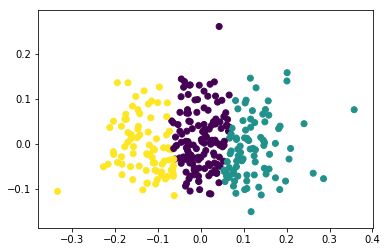

Comparing k-means clusters against the data with n_clusters:  3
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33
Total time:  0.2980690002441406


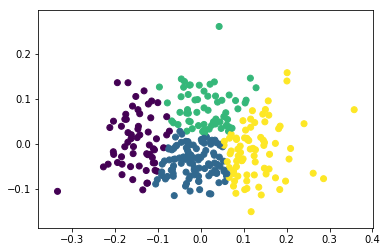

Comparing k-means clusters against the data with n_clusters:  4
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56
Total time:  0.3338639736175537


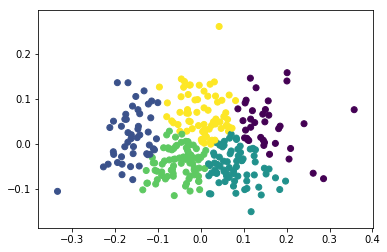

Comparing k-means clusters against the data with n_clusters:  5
col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28
Total time:  0.3046910762786865


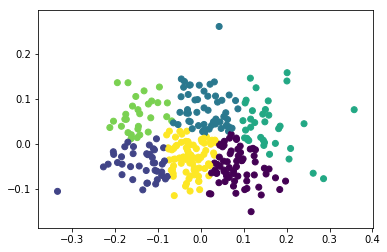

Comparing k-means clusters against the data with n_clusters:  6
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44
Total time:  0.33411622047424316


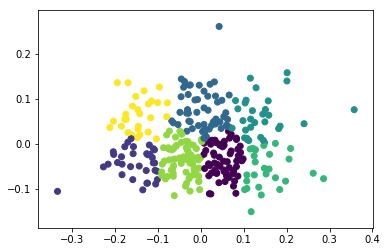

Comparing k-means clusters against the data with n_clusters:  7
col_0   0   1
row_0        
0      14  48
1      19  15
2      34  20
3      16  15
4       3  23
5      31  37
6      22   6
Total time:  0.3343801498413086


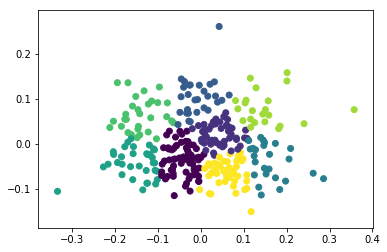

Comparing k-means clusters against the data with n_clusters:  8
col_0   0   1
row_0        
0      32  35
1      22  29
2      17  12
3       5  20
4      19  15
5      24   6
6      12  10
7       8  37
Total time:  0.49854063987731934


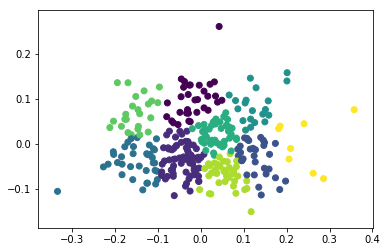

Comparing k-means clusters against the data with n_clusters:  9
col_0   0   1
row_0        
0      19  13
1      32  35
2       8  24
3      20  16
4      13   7
5      20  25
6      20   4
7       6  33
8       1   7
Total time:  0.3320488929748535


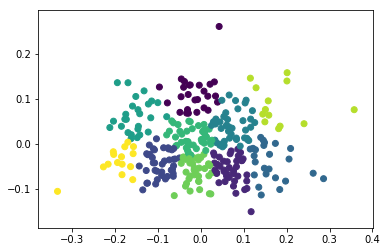

Comparing k-means clusters against the data with n_clusters:  10
col_0   0   1
row_0        
0      15  11
1       7  34
2      15  24
3       4  20
4      23  20
5      20   6
6      23  18
7      14  21
8       7   6
9      11   4
Total time:  0.4397597312927246


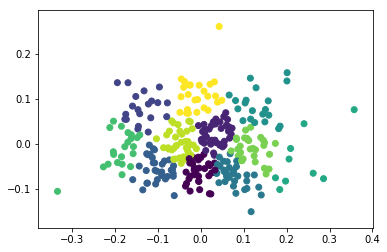

Comparing k-means clusters against the data with n_clusters:  11
col_0   0   1
row_0        
0      11  21
1      18  23
2      17   3
3      11  21
4       5  28
5      13   7
6       0   9
7      16   6
8       9  21
9      25  14
10     14  11
Total time:  0.3888208866119385


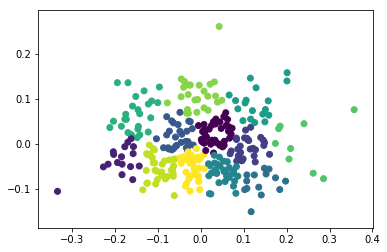

Comparing k-means clusters against the data with n_clusters:  12
col_0   0   1
row_0        
0      18  22
1      12   5
2       8  20
3      21   9
4       2  12
5       6  26
6      12   6
7      20   5
8       1   8
9      14  11
10     11  21
11     14  19
Total time:  0.430300235748291


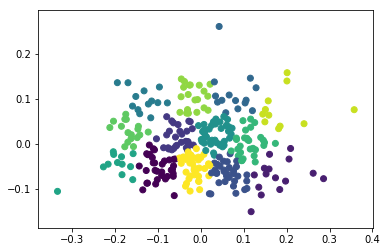

Comparing k-means clusters against the data with n_clusters:  13
col_0   0   1
row_0        
0      11  22
1       2  13
2      20   9
3       6  28
4      11   3
5      12   1
6      17  23
7       8   4
8       9  20
9      13   4
10     11   9
11      5   6
12     14  22
Total time:  0.34709596633911133


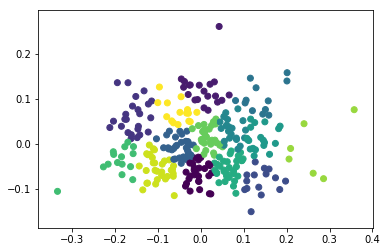

Comparing k-means clusters against the data with n_clusters:  14
col_0   0   1
row_0        
0       9  19
1      13   7
2      19   5
3       2  13
4      20  13
5       8   4
6      11  11
7       6  13
8       7  26
9      11   4
10     13  17
11      0   6
12     11  20
13      9   6
Total time:  0.48699522018432617


In [19]:
for n in np.arange(2,15):
    start = time.time()
    y_pred = KMeans(n_clusters=n, random_state=42).fit_predict(X_pca)
    #print('done')
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
    plt.show()

# Check the solution against the data.
    conf_mat = pd.crosstab(y_pred, y)
    print('Comparing k-means clusters against the data with n_clusters: ', n)
    print(conf_mat)
    print('Total time: ', time.time() - start)

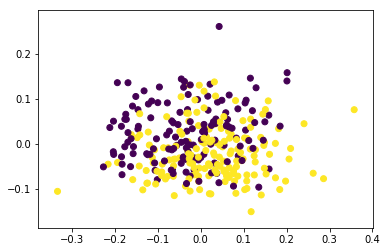

In [17]:
# actual data 
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.show()

### Answers 

1. It seems the n_clusters = 3 capture the actual distribution well. 

2. Not sure about complexity. In terms of time it didn't take long. Have to do a big O notation? 